https://intellipaat.com/blog/fraud-detection-machine-learning-algorithms/

https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

https://www.kaggle.com/code/arjunjoshua/predicting-fraud-in-financial-payment-services/notebook

https://www.kaggle.com/code/netzone/eda-and-fraud-detection

https://www.kaggle.com/code/benroshan/transaction-fraud-detection#%F0%9F%93%8B-Pivot-table-analysis

https://www.kaggle.com/code/ataboydata/fraud-detection-with-different-methods

# Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


Source dataset: https://www.kaggle.com/datasets/ealaxi/paysim1

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Dataset /Customer_Analysis/PS_20174392719_1491204439457_log.csv")
print('Shape: ',df.shape)
df.head()

Shape:  (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Seem likes dataset has been preprocessed. Its kinda clear

Key Takeaways:

There are no missing values

There are just over 6 million observations

There are 11 variables

Most transactions involve amounts less than 1 million euros.

Most observations in the dataset are of valid transactions, so any patterns related to identifying fraud transactions may be hard to see, data is also unbalanced.

From the sample of observations, there are many instances where what happens to the recipient account (oldbalanceDest, newbalanceDest) does not make sense (e.g. the very first observation involved a payment of 9839.64 yet, the balance before and after the transaction equals 0.)

Responding to takeaways

No imputation is required until further notice

Non-parametric machine learning methods may be preferred due to the large size of the data and that the goal is accurate classification, not interpretation

Dimension Reduction methods may not be necessary

(and points 5, 6) Since the data is unbalanced I want to visually compare fraud transactions to valid transactions and see if there are any important patterns that could be useful.

# Explotary Data Analysis

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df_pivot=pd.pivot_table(df,index=["type"],
                               values=['amount','isFraud','isFlaggedFraud'],
                               aggfunc=[np.sum,np.std], margins=True)

#Adding color gradient 
cm = sns.light_palette("green", as_cmap=True)
df_pivot.style.background_gradient(cmap=cm)

<AxesSubplot:>

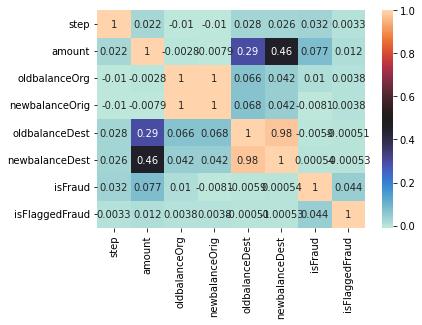

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap= 'icefire')

 From the hypothesis, isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds (amount 200k transactions) being triggered.

In [ ]:
print('isFraud counts:\n',df['isFraud'].value_counts())
print('isFlaggedFraud counts:\n',df['isFlaggedFraud'].value_counts())

isFraud counts:
 0    6354407
1       8213
Name: isFraud, dtype: int64
isFlaggedFraud counts:
 0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


Look at this skewed show that how dataset imbalanced is =))

In [ ]:
print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.87 % of the dataset
Frauds 0.13 % of the dataset


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


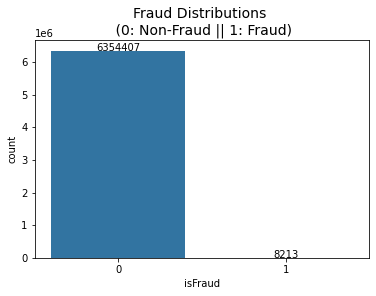

In [ ]:
sns.countplot('isFraud', data=df)
plt.title('Fraud Distributions \n (0: Non-Fraud || 1: Fraud)', fontsize=14)
value_counts = df['isFraud'].value_counts()

# Iterate over the value counts and add them to the plot
for i, count in enumerate(value_counts):
    plt.text(i, count+100, count, ha='center')  

plt.show()

The original dataset is imbalanced between Fraud and non-Fraud, most of them are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are non-fraud.

## FlaggedFraud

Now let see whether which type have only 16 FlaggedFraud in 6 milion transactions =))

In [ ]:
print('The types of flagged fraudulent transactions are {}'.format(list(df.loc[df['isFlaggedFraud'] == 1].type.drop_duplicates().values)))

The types of flagged fraudulent transactions are ['TRANSFER']


In [ ]:
print('The number of flagged fraudulent TRANSFER = {}'.format(len(df.loc[(df['isFlaggedFraud'] == 1) & (df['type'] == 'TRANSFER')])))

The number of flagged fraudulent TRANSFER = 16


In [ ]:
flagged = df.loc[df["isFlaggedFraud"] == 1] #observation
flagged_correctly = sum(flagged["isFraud"] == 1) #number of transactions is actual fraud and flagged
flagged_wrongly = len(flagged) - flagged_correctly
print(flagged_correctly,"observations were flagged correctly and", flagged_wrongly, \
      "observations were flagged wrongly for a total of", len(flagged), "flagged observations.")

# how many observations where the transaction is fraudulent, the transaction is a transfer
# and the amount is greater than 200.000 are in the dataset
should_be_flagged = df.loc[df["isFraud"] == 1][(df.loc[df["isFraud"] == 1]["amount"] > 200000) & (df.loc[df["isFraud"] == 1]["type"] == "TRANSFER")]
print("number of observations that should be flagged: ",len(should_be_flagged))

16 observations were flagged correctly and 0 observations were flagged wrongly for a total of 16 flagged observations.
number of observations that should be flagged:  2740


In [ ]:
dfTransfer = df.loc[df["type"] == 'TRANSFER']
dfFlagged = df.loc[df["isFlaggedFraud"] == 1]
dfNotFlagged = df.loc[df["isFlaggedFraud"] == 0]

print('Min amount transacted when isFlaggedFraud is set = {}'.format(dfFlagged["amount"].min()))

print('Max amount transacted in a TRANSFER where isFlaggedFraud is not set =\
 {}'.format(dfTransfer.loc[dfTransfer["isFlaggedFraud"] == 0]["amount"].max()))

Min amount transacted when isFlaggedFraud is set = 353874.22
Max amount transacted in a TRANSFER where isFlaggedFraud is not set = 92445516.64


In [ ]:
print('Have originators of transactions flagged as fraud transacted more than once? {}'\
.format((dfFlagged["nameOrig"].isin(pd.concat([dfNotFlagged["nameOrig"], dfNotFlagged["nameDest"]]))).any()))

print('Have destinations for transactions flagged as fraud initiated other transactions? \
{}'.format((dfFlagged["nameDest"].isin(dfNotFlagged["nameOrig"])).any()))
# Since only 2 destination accounts of 16 that have 'isFlaggedFraud' set have been destination accounts more than once,
# Clearly 'isFlaggedFraud' being set is independent of whether a destination account has been used before or not

print('How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: {}'\
.format(sum(dfFlagged["nameDest"].isin(dfNotFlagged["nameDest"])))) 

Have originators of transactions flagged as fraud transacted more than once? False
Have destinations for transactions flagged as fraud initiated other transactions? False
How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: 2


So it looks the simulation can flag only 16 transfer transactions as fraud. Let's look at those records and compare with the records which the system cannot catch'em.

The plot below will also focus only on transfer transaction type.

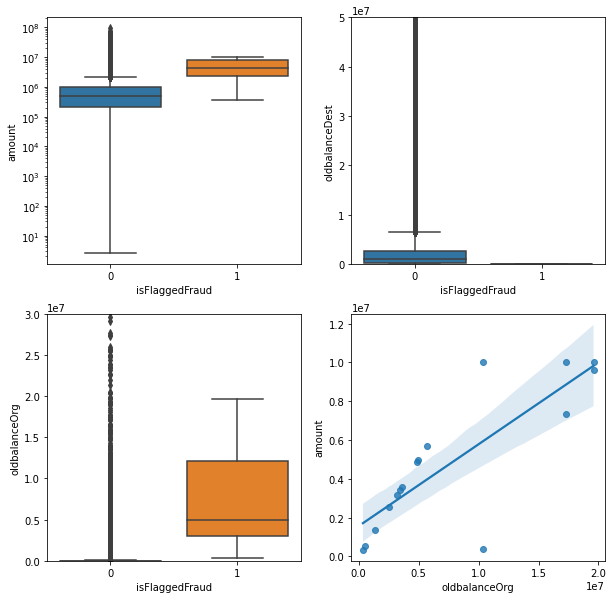

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df['type'] == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0, 0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrg', data=tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0, 3e7))
d = sns.regplot(x = 'oldbalanceOrg', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :], ax=axs[1][1])
plt.show()

Conclusion:

In a modified dataset with more than 2 million observations, a variable that brings attention to only 16 observations is insignificant.

Furthermore, the number of transactions that should have been flagged(16) far exceeds the number of observations that were actually flagged(2740).

For that reason, I am omitting the isFlaggedFraud column from the analysis.

## Account type

One feature of the dataset that is not immediately presented on the kaggle overview page is the account types "C" (customer) and "M" (Merchant), which would be the first character for each value under nameOrig and nameDest. Could this be a predictor?

In [ ]:
data_account = df.copy() # creating copy of dataset in case I need original dataset
data_account["type1"] = np.nan # initializing feature column

# filling feature column
data_account.loc[df["nameOrig"].str.contains('C') & df["nameDest"].str.contains('C'),"type1"] = "CC" 
data_account.loc[df["nameOrig"].str.contains('C') & df["nameDest"].str.contains('M'),"type1"] = "CM"
data_account.loc[df["nameOrig"].str.contains('M') & df["nameDest"].str.contains('C'),"type1"] = "MC"
data_account.loc[df["nameOrig"].str.contains('M') & df["nameDest"].str.contains('M'),"type1"] = "MM"

In [ ]:
# seeing the counts of transactions by type1 (CC,CM,MC,MM)
type_account = data_account['type1'].value_counts()
fraud_type_account = data_account[data_account["isFraud"] == 1]["type1"].value_counts()
non_fraud_type_account = data_account[data_account["isFraud"] == 0]["type1"].value_counts()

print("Account types count: \n", type_account)
print("\nFraud transactions by type1: \n", fraud_type_account)
print("\nValid transactions by type1: \n", non_fraud_type_account)

Account types count: 
 CC    4211125
CM    2151495
Name: type1, dtype: int64

Fraud transactions by type1: 
 CC    8213
Name: type1, dtype: int64

Valid transactions by type1: 
 CC    4202912
CM    2151495
Name: type1, dtype: int64


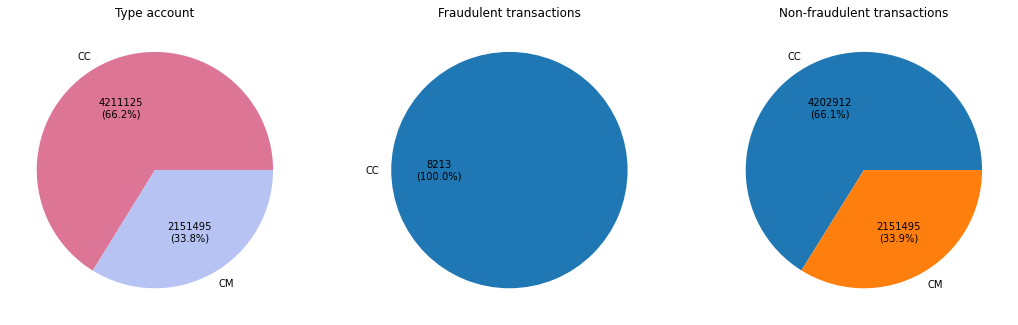

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,10))

# add count values to autopct string
fraud_autopct = lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(fraud_type_account.values)/100, p)
non_fraud_autopct = lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(non_fraud_type_account.values)/100, p)
type_account_autpct = lambda p:'{:.0f}\n({:.1f}%)'.format(p * sum(type_account.values)/100, p)

ax[0].pie(type_account.values, labels = type_account.index, autopct = type_account_autpct, colors = ['#DD7596', '#B7C3F3'])
ax[0].set_title('Type account')

ax[1].pie(fraud_type_account.values, labels=fraud_type_account.index, autopct=fraud_autopct)
ax[1].set_title('Fraudulent transactions')

ax[2].pie(non_fraud_type_account.values, labels=non_fraud_type_account.index, autopct=non_fraud_autopct)
ax[2].set_title('Non-fraudulent transactions')

plt.show()

Conclusion:
From the dataset, it seems that fraud transactions only occur when the transaction type1 is CC (Customer to Customer). I will assume that fraudulent transaction only occur when transaction type1 is CC.

However, since all relevant observations have type1 = "CC", the type1 column is no longer necessary.

## Transaction type

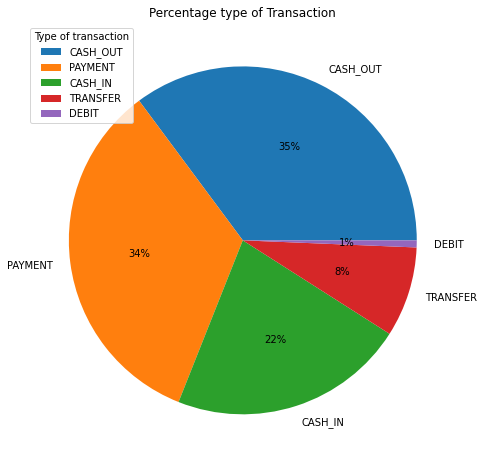

In [ ]:
type_transaction = df['type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(type_transaction.values, labels=type_transaction.index, autopct='%1.0f%%')
plt.title('Percentage type of Transaction')
plt.legend(loc='upper left', title = 'Type of transaction')
plt.show()

In [ ]:
print('The types of fraudulent transactions are {}'.format(list(df.loc[df['isFraud'] == 1]["type"].drop_duplicates().values))) 

The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [ ]:
dfFraudTransfer = df.loc[(df['isFraud'] == 1) & (df['type'] == 'TRANSFER')]
dfFraudCashout = df.loc[(df['isFraud'] == 1) & (df['type'] == 'CASH_OUT')]

print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


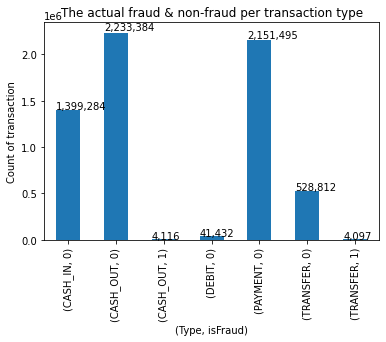

In [ ]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("The actual fraud & non-fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

It seem likes only TRANSFER and CASH_OUT transaction approximately have the same number of Fraud

## Looking balances before and after the transaction

2.4. Are there account labels common to fraudulent TRANSFERs and CASH_OUTs?

From the data description, the modus operandi for committing fraud involves first making a TRANSFER to a (fraudulent) account which in turn conducts a CASH_OUT. CASH_OUT involves transacting with a merchant who pays out cash. Thus, within this two-step process, the fraudulent account would be both, the destination in a TRANSFER and the originator in a CASH_OUT. However, the data shows below that there are no such common accounts among fraudulent transactions. Thus, the data is not imprinted with the expected modus-operandi.

In [9]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print('Within fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? {}'\
      .format((dfFraudTransfer.nameDest.isin(dfFraudCashout.nameOrig)).any())) 

dfNotFraud = df.loc[df.isFraud == 0]

Within fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? False


In [8]:
print('\nFraudulent TRANSFERs whose destination accounts are originators of genuine CASH_OUTs: \n\n{}'\
      .format(dfFraudTransfer.loc[dfFraudTransfer.nameDest.\
                                  isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]))


Fraudulent TRANSFERs whose destination accounts are originators of genuine CASH_OUTs: 

         step      type      amount     nameOrig  oldbalanceOrg  \
1030443    65  TRANSFER  1282971.57  C1175896731     1282971.57   
6039814   486  TRANSFER   214793.32  C2140495649      214793.32   
6362556   738  TRANSFER   814689.88  C2029041842      814689.88   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


In [10]:
print('\nFraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = {}'\
      .format(dfNotFraud.loc[(dfNotFraud.type == 'CASH_OUT') & (dfNotFraud.nameOrig == 'C423543548')].step.values)) # 185

print('\nFraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = {}'\
      .format(dfNotFraud.loc[(dfNotFraud.type == 'CASH_OUT') & (dfNotFraud.nameOrig == 'C1714931087')].step.values)) # 185

print('\nFraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = {}'\
      .format(dfNotFraud.loc[(dfNotFraud.type == 'CASH_OUT') & (dfNotFraud.nameOrig == 'C1023330867')].step.values)) # 185


Fraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = [185]

Fraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = [546]

Fraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = [132]


However, 2 out of 3 of these accounts first make a genuine CASH_OUT and only later (as evidenced by the time step) receive a fraudulent TRANSFER. Thus, fraudulent transactions are not indicated by the nameOrig and nameDest features

Conclusion: Noting from section 2.3 above that the nameOrig and nameDest features neither encode merchant accounts in the expected way, below, we drop these features from the data since they are meaningless.

In [ ]:
wrong_orig_bal = sum(df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"])
wrong_dest_bal = sum(df["newbalanceDest"] + df["amount"] != df["newbalanceDest"])
print("Number of observations with balance errors in the account giving money:", wrong_orig_bal)
print("Percentage of observations with balance errors in the account giving money:", 100*round(wrong_orig_bal/len(df),2))
print("Number of observations with balance errors in the account receiving money:", wrong_dest_bal)
print("Percentage of observations with balance errors in the account receiving money:", 100*round(wrong_dest_bal/len(df),2))

Number of observations with balance errors in the account giving money: 5413997
Percentage of observations with balance errors in the account giving money: 85.0
Number of observations with balance errors in the account receiving money: 6362604
Percentage of observations with balance errors in the account receiving money: 100.0


Almost all of the observations have inaccurately portrayed what happens to the account receiving money and the account sending money.

Some form of complete or partial imputation (filling/replacing missing or wrong values) must happen

In [ ]:
# adding features errorBalanceOrg, errorBalanceDest
data_new = df.copy()
data_new["errorBalanceOrg"] = data_new.newbalanceOrig + data_new.amount - data_new.oldbalanceOrg
data_new["errorBalanceDest"] = data_new.oldbalanceDest + data_new.amount - data_new.newbalanceDest

# Subsetting data into observations with fraud and valid transactions:
fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]

In [ ]:
print("Summary statistics of errorBalanceOrg for fraudulent transactions: \n",fraud["errorBalanceOrg"].describe())
print("\n Summary statistics of errorBalanceOrg for valid transactions: \n",valid["errorBalanceOrg"].describe())

Summary statistics of errorBalanceOrg for fraudulent transactions: 
 count    8.213000e+03
mean     1.069233e+04
std      2.651461e+05
min     -7.450581e-09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: errorBalanceOrg, dtype: float64

 Summary statistics of errorBalanceOrg for valid transactions: 
 count    6.354407e+06
mean     2.013386e+05
std      6.069289e+05
min     -1.000000e-02
25%      3.034305e+03
50%      6.904931e+04
75%      2.499534e+05
max      9.244552e+07
Name: errorBalanceOrg, dtype: float64


From the summary statistics on the errorBalanceOrg, it seems that a large proportion of the data have an error of 0 or close to zero. This is indicated by the fact that the most negative error is -7.450581e-09 or  −7.450581x10−9
  which is very small and close to 0, and the 3rd quartile is 0 (that is, about 75% of the data is between -7.450581e-09 and 0). However, there are some large errors, the largest error being 10,000,000.

On the other hand, for valid transactions, a large proportion of the data have large errors. For instance, about 75% of the data haver errors exceeding 52,613.43 (the first quartile). The largest error is 92,445,520.

In [ ]:
print("Summary statistics of errorBalanceDest for fraudulent transactions: \n",fraud["errorBalanceDest"].describe())
print("\n Summary statistics of errorBalanceDest for valid transactions: \n",valid["errorBalanceDest"].describe())

Summary statistics of errorBalanceDest for fraudulent transactions: 
 count    8.213000e+03
mean     7.325093e+05
std      1.867748e+06
min     -8.875516e+06
25%      0.000000e+00
50%      2.231460e+03
75%      4.427220e+05
max      1.000000e+07
Name: errorBalanceDest, dtype: float64

 Summary statistics of errorBalanceDest for valid transactions: 
 count    6.354407e+06
mean     5.469223e+04
std      4.360026e+05
min     -7.588573e+07
25%      0.000000e+00
50%      3.500680e+03
75%      2.925981e+04
max      1.319123e+07
Name: errorBalanceDest, dtype: float64


From the summary statistics of the errorBalanceDest variable, the errors are huge in both directions (both fraudulent and valid transactions have large positive and negative errors in the accounts where money has been moved to.)

Let's see what the differences look like when I plot errorBalanceOrg and errorBalanceDest together.

In [ ]:
print("Proportion of fraudulent transactions with errorBalanceDest > 0: ", len(fraud[fraud.errorBalanceDest > 0])/len(fraud))
print("Proportion of valid transactions with errorBalanceDest > 0: ", len(valid[valid.errorBalanceDest > 0])/len(valid))
print("Proportion of fraudulent transactions with errorBalanceOrg > 0: ", len(fraud[fraud.errorBalanceOrg > 0])/len(fraud))
print("Proportion of valid transactions with errorBalanceOrg > 0: ", len(valid[valid.errorBalanceOrg > 0])/len(valid))

Proportion of fraudulent transactions with errorBalanceDest > 0:  0.5712894192134421
Proportion of valid transactions with errorBalanceDest > 0:  0.6413928160408988
Proportion of fraudulent transactions with errorBalanceOrg > 0:  0.006331425788384269
Proportion of valid transactions with errorBalanceOrg > 0:  0.8036598851789003


Conclusion:
The spread of errors in both the balanceOrg and balanceDest variables are large, however valid transactions are much more likely to have an errorBalanceOrg > 0.

Similarly, fraudulent transactions are much more likely to have errorBalanceDest > 0 than valid transactions.

In addition, only valid transactions have errorBalanceDest > 10,000,000

These distinctions and probably more, make errorBalanceDest and errorBalanceOrg potentially effective features.

Conclusion:

Thus in this dataset, for fraudulent transactions, the account that received funds during a TRANSFER was not used at all for CASH OUT.

If that is the case, there seems to be no use for nameOrig or nameDest since there seems to be no restrictions on which accounts CASH OUT from fraudulent transactions.

Thus, I am omitting the nameOrig and nameDest columns from analysis.

## Time step (Hour) and Amount transactions

In [ ]:
df_Fraud = df.loc[df["isFraud"] == 1]
df_Valid = df.loc[df["isFraud"] == 0]

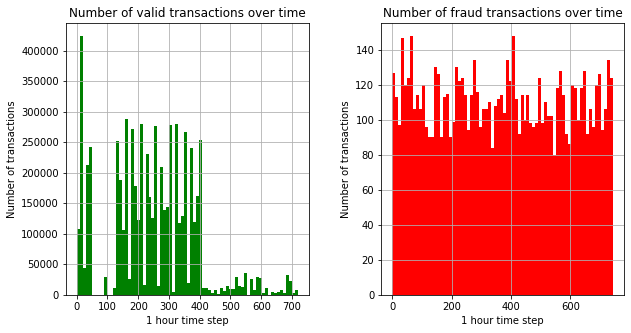

In [ ]:
bins = round(744 / 10) #I take total step per 10, its equivalent each 10 hours per column

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot histogram for valid transactions
df_Valid.hist(column="step", color="green", bins=bins, ax=axs[0])
axs[0].set_xlabel("1 hour time step")
axs[0].set_ylabel("Number of transactions")
axs[0].set_title("Number of valid transactions over time")

# plot histogram for fraud transactions
df_Fraud.hist(column="step", color="red", bins=bins, ax=axs[1])
axs[1].set_xlabel("1 hour time step")
axs[1].set_ylabel("Number of transactions")
axs[1].set_title("Number of fraud transactions over time")

plt.show()

There are stark difference between the step data between valid and fraud transactions.

A large proportion of valid transactions occur between around the 0th and 60th timestep as well as the 110th and 410th hours.
The frequency at which fraudulent transactions occur does not seem to change much over time.

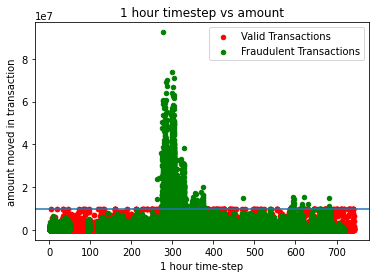

Proportion of transactions where the amount moved is greater than 10 million:  0.00038396132410862193


In [ ]:
# plotting overlayed step vs amount scatter plots
fig,ax = plt.subplots()
df_Fraud.plot.scatter(x="step",y="amount",color="red",ax=ax,label="Valid Transactions")
df_Valid.plot.scatter(x="step",y="amount",color="green",ax=ax, label="Fraudulent Transactions")

plt.title("1 hour timestep vs amount")
plt.xlabel("1 hour time-step")
plt.ylabel("amount moved in transaction")
plt.legend(loc="upper right")

# plotting a horizontal line to show where valid transactions behave very differently from fraud transactions
plt.axhline(y=1e7)
plt.show()

print("Proportion of transactions where the amount moved is greater than 10 million: ", \
      len(df[df.amount > 1e7])/len(df))

Only valid transaction involved amounts larger than 10,000,000, however these transactions make up less than 0.01% of the relevant data.

When the amounts moved is less than 10,000,000 there doesn't seem to be a large difference fraudulent and valid transactions.

# Preprocess

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

from sklearn import metrics

In [66]:
df1 = df.copy()
df1 = df1.drop(["isFlaggedFraud",'nameOrig','nameDest'], axis = 1)
df1 = df1.loc[(df['type'].isin(['TRANSFER', 'CASH_OUT'])),:]

In [67]:
df1 = pd.get_dummies(df1,prefix=['type'])

In [65]:
print(df1.shape)
df1.head()

(2786835, 9)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,1


In [130]:
df1["isFraud"].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [ ]:
X = df1.drop("isFraud",1)
Y = df1["isFraud"]

## Under Sampling

Selection of ML algorithm: A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded. A better approach might be to oversample the minority class, say by the synthetic minority oversampling technique (SMOTE) contained in the 'imblearn' library. Motivated by this, I tried a variety of anomaly-detection and supervised learning approaches. I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Among these algorithms, the extreme gradient-boosted (XGBoost) algorithm used below slightly outperforms random-forest. Finally, XGBoost, like several other ML algorithms, allows for weighting the positive class more compared to the negative class --- a setting that also allows to account for the skew in the data.

In [76]:
rus = RandomUnderSampler(sampling_strategy=1, random_state=42) # I set strategy = 1 to pick same sample X and Y

In [79]:
X, Y = rus.fit_resample(X, Y)

In [80]:
Y.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

## Split data 

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((13140, 8), (3286, 8), (13140,), (3286,))

## Standardization

In [83]:
scaler = StandardScaler()
scaler.fit(X_train)
                            
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning 

## Logistic Regression

In [138]:
LGR = LogisticRegression().fit(X_train,Y_train)

Y_pred_LGR = LGR.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1649
           1       0.94      0.87      0.90      1637

    accuracy                           0.91      3286
   macro avg       0.91      0.91      0.91      3286
weighted avg       0.91      0.91      0.91      3286



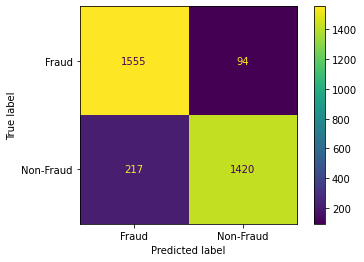

In [139]:
report = metrics.classification_report(Y_test, Y_pred_LGR)
print(report)
cm = metrics.confusion_matrix(Y_test,Y_pred_LGR)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fraud','Non-Fraud'])
cm_display.plot()
plt.show()

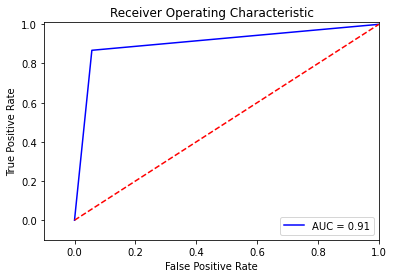

In [140]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test.values.ravel(),Y_pred_LGR)
roc_auc = metrics.auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Bernouli Naive Bayes

In [136]:
BNBayes = BernoulliNB().fit(X_train, Y_train)

Y_pred_BNB = BNBayes.predict(X_test)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1649
           1       0.81      0.68      0.74      1637

    accuracy                           0.76      3286
   macro avg       0.77      0.76      0.76      3286
weighted avg       0.77      0.76      0.76      3286



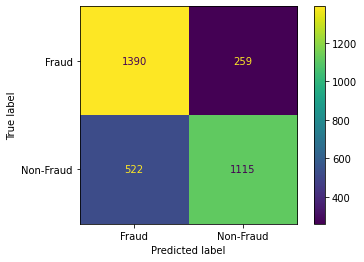

In [137]:
report = metrics.classification_report(Y_test, Y_pred_BNB)
print(report)
cm = metrics.confusion_matrix(Y_test,Y_pred_BNB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fraud','Non-Fraud'])
cm_display.plot()
plt.show()

## Suport Vector Machine


In [ ]:
SVM = LinearSVC().fit(X_train, Y_train)

Y_pred_SVM = SVM.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1649
           1       0.94      0.88      0.91      1637

    accuracy                           0.91      3286
   macro avg       0.91      0.91      0.91      3286
weighted avg       0.91      0.91      0.91      3286



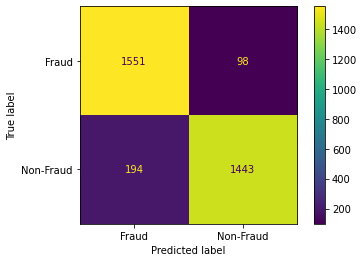

In [135]:
report = metrics.classification_report(Y_test, Y_pred_SVM)
print(report)
cm = metrics.confusion_matrix(Y_test,Y_pred_SVM)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fraud','Non-Fraud'])
cm_display.plot()
plt.show()

## K-Nearest Neighbors

In [147]:
KNN = KNeighborsClassifier().fit(X_train, Y_train)

Y_pred_KNN = KNN.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1649
           1       0.94      0.92      0.93      1637

    accuracy                           0.93      3286
   macro avg       0.93      0.93      0.93      3286
weighted avg       0.93      0.93      0.93      3286



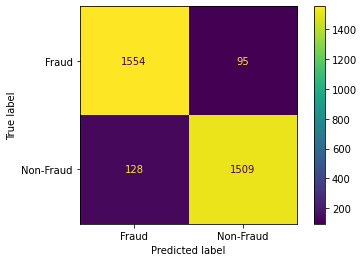

In [148]:
report = metrics.classification_report(Y_test, Y_pred_KNN)
print(report)
cm = metrics.confusion_matrix(Y_test,Y_pred_KNN)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fraud','Non-Fraud'])
cm_display.plot()
plt.show()

## Extreme Gradient Boosting

In [141]:
XGB = XGBClassifier(max_depth = 3,  n_jobs = 4, random_state=42).fit(X_train, Y_train)

Y_pred_XGB = XGB.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



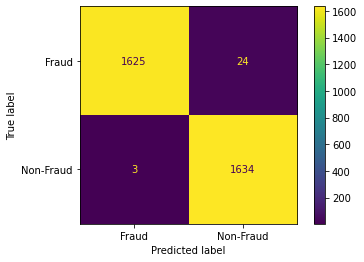

In [142]:
report = metrics.classification_report(Y_test, Y_pred_XGB)
print(report)
cm = metrics.confusion_matrix(Y_test,Y_pred_XGB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Fraud','Non-Fraud'])
cm_display.plot()
plt.show()

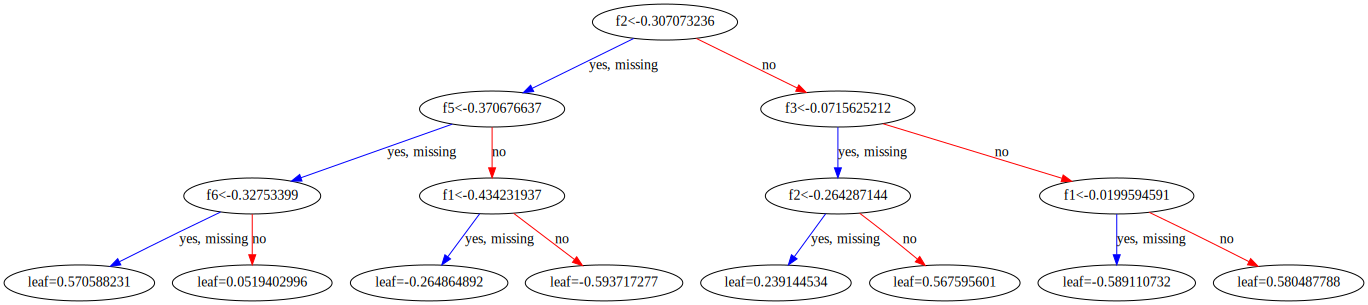

In [143]:
to_graphviz(XGB)

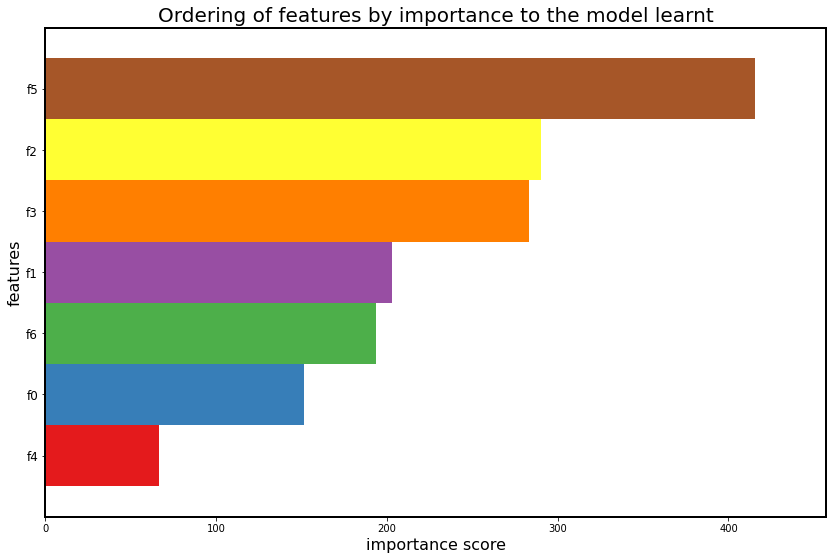

In [108]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(XGB, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [145]:
%%time
from sklearn.model_selection import learning_curve    
trainSizes, trainScores, crossValScores = learning_curve(\
                              XGBClassifier(max_depth = 3, n_jobs = 4), X_train, Y_train, scoring = 'average_precision')

CPU times: user 11.1 s, sys: 833 ms, total: 11.9 s
Wall time: 7.59 s


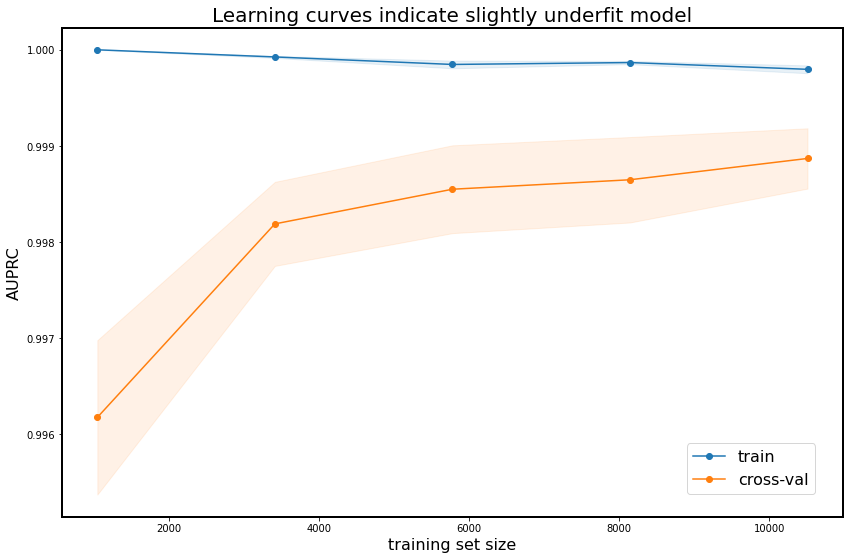

In [146]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
    trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
    crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', \
         color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', \
         color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

## Multi Layer Perceptron

In [43]:
from sklearn.neural_network import MLPClassifier

In [102]:
ncols = len(X.columns)
hidden_layers = (ncols,ncols,ncols)
max_iter = 1000
print(hidden_layers)

(8, 8, 8)


In [103]:
MLP = MLPClassifier(hidden_layer_sizes=hidden_layers,max_iter=1000,random_state=42)

# training model
MLP.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=1000, random_state=42)

In [105]:
# evaluating model on how it performs on balanced datasets
predictionsMLP = MLP.predict(X_test)
CM_MLP = metrics.confusion_matrix(Y_test,predictionsMLP)
CR_MLP = metrics.classification_report(Y_test,predictionsMLP)
fprMLP, recallMLP, thresholdsMLP = metrics.roc_curve(Y_test, predictionsMLP)
AUC_MLP = metrics.auc(fprMLP, recallMLP)
    
resultsMLP = {"Confusion Matrix":CM_MLP,"Classification Report":CR_MLP,"Area Under Curve":AUC_MLP}

In [111]:
# showing results from Multilayered perceptrons developed from each dataset
for measure in resultsMLP:
    print(measure,": \n",resultsMLP[measure])

Confusion Matrix : 
 [[1628   21]
 [  44 1593]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1649
           1       0.99      0.97      0.98      1637

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286

Area Under Curve : 
 0.9801932864663541


# Evaluation

In [125]:
print('skew = {}'.format( len(df.loc[df["isFraud"]==1]) / float(len(X)) ))


skew = 0.5


In [154]:
AUPRC_LGR = metrics.average_precision_score(Y_test, Y_pred_LGR)
AUPRC_SVM = metrics.average_precision_score(Y_test, Y_pred_SVM)
AUPRC_BNB = metrics.average_precision_score(Y_test, Y_pred_BNB)
AUPRC_KNN = metrics.average_precision_score(Y_test, Y_pred_KNN)
AUPRC_XGB = metrics.average_precision_score(Y_test, Y_pred_XGB)

model_name = ["LogisticsR","SVM","BernouliNB","KNN","XGBoost"]
AUPRC_score = [AUPRC_LGR, AUPRC_SVM, AUPRC_BNB, AUPRC_KNN, AUPRC_XGB]

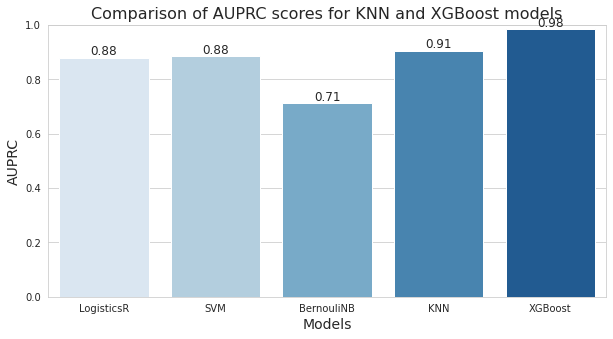

In [164]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
ax = sns.barplot(x=model_name, y=AUPRC_score, palette="Blues")

# set the y-axis limit to 1.0
ax.set_ylim(0, 1.0)

# add text labels to the bars
for i, score in enumerate(AUPRC_score):
    ax.text(i, score+0.01, round(score, 2), ha='center', fontsize=12)

# set the plot title and axis labels
ax.set_title('Comparison of AUPRC scores for KNN and XGBoost models', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('AUPRC', fontsize=14)

# show the plot
plt.show()

We thoroughly interrogated the data at the outset to gain insight into which features could be discarded and those which could be valuably engineered. The plots provided visual confirmation that the data could be indeed be discriminated with the aid of the new features. To deal with the large skew in the data, we chose an appropriate metric and used an ML algorithm based on an ensemble of decision trees which works best with strongly imbalanced classes. The method used in this kernel should therefore be broadly applicable to a range of such problems

# The end